In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import IsolationForest

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
from scipy import stats
path = "../input/creditcardfraud/creditcard.csv"

#read data from csv
data=pd.read_csv(path)

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


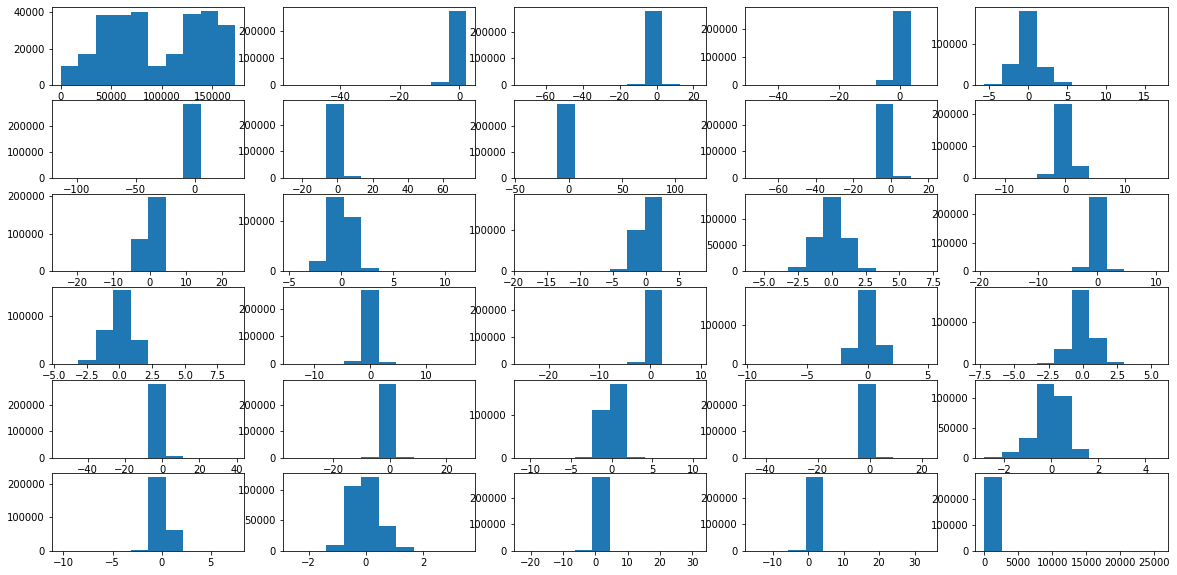

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6,5,figsize=(20,10))
for count, item in enumerate(ax.reshape(-1)):
    item.hist(data.iloc[:,count])

**Anomaly detection** involves identifying rare suspicious items or observations because they differ significantly from standard or normal patterns. 

In [6]:
print('This dataset has '+str(data['Class'].shape[0])+ ' objects, in which '+str(data[data['Class']==0].shape[0])+' items are non-anomalous and '+str(data[data['Class']==1].shape[0])+' anomalous or fraud.')

This dataset has 284807 objects, in which 284315 items are non-anomalous and 492 anomalous or fraud.


The data is split into training, validation, and test sets to develop and evaluate an anomaly detection approach as follows:

* 60% of the non-anomalous or normal data is used for the training set.
* The other part of the non-anomalous and anomalous data is split equally in the validation and testing sets 20% for validation and 20% for testing.

In [7]:
# split data in train, validation, test

v_t_percent=0.4
y=data['Class']
y_0=np.where(y==0)
y_1=np.where(y==1)
t=int((np.size(y_0)*v_t_percent)/100)

# normal data for trainin
data_train=data.iloc[y_0[0][t:],:-1]
Y_train=y[y_0[0][t:]]

data_temp0=data.iloc[y_0[0][:t],:-1]
Y_temp0=y[y_0[0][:t]]
data_temp1=data.iloc[y_1[0][:],:-1]
Y_temp1=y[y_1[0][:]]

# normal and anomalous data for validation
data_val=pd.concat([data_temp0.iloc[:data_temp0.shape[0]//2,:],data_temp1.iloc[:data_temp1.shape[0]//2,:]])
Y_val=pd.concat([Y_temp0[:data_temp0.shape[0]//2],Y_temp1[:data_temp1.shape[0]//2]])

# normal and anomalous data for test
data_test=pd.concat([data_temp0.iloc[data_temp0.shape[0]//2:,:],data_temp1.iloc[data_temp1.shape[0]//2:,:]])
Y_test=pd.concat([Y_temp0[data_temp0.shape[0]//2:],Y_temp1[data_temp1.shape[0]//2:]])

print('All data: '+str(data.iloc[:,:-1].shape),'Training set: '+str(data_train.shape),'Validation set:'+str(data_val.shape),'Test set: '+str(data_test.shape))

All data: (284807, 30) Training set: (283178, 30) Validation set:(814, 30) Test set: (815, 30)


This problem will be solved such that given x, the model will predict 1, corresponding to an anomaly or 0 to a normal example.
In this case, three differents approches are used https://scikit-learn.org/stable/user_guide.html
* Isolation Forest
    * The **Isolation Forest** is an anomaly detection algorithm. It detects anomalies using isolation rather than modeling the normal points.
* Gaussian Mixture
    * A **Gaussian Mixture model** is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
* One Class SVM
    * **The One Class SVM** is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.


In [8]:
import time
def tic():
    t = time.time()
    return t

def toc(t):
    return time.time() - t

**Isolation Forest**

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
# Training isolation forest with different number of base estimators in the ensemble.

max_f=0
best_n_estimators=10
l_n_estimators=np.arange(10,100,10)
f_list=[0]*l_n_estimators.shape[0]
model_list=[]
j=0
t=tic()
for i in l_n_estimators:
    model=IsolationForest(n_estimators=i)
    model.fit(data_train)
    model_list.append(model)
    #prediction with the validation set
    predit_y=model.predict(data_val)    
    predit_ = [1 if l ==-1 else 0 for l in predit_y]

    # metrics with isolation forest
    F_score=f1_score(Y_val,predit_)    
    f_list[j]=F_score
    j+=1
t=toc(t)
#select the best model according the validation set
best_n_estimators=np.argmax(f_list)
b_model=model_list[best_n_estimators]
model_list.clear()
print('The training of a data of '+str(data_train.shape[0])+' objects take '+str(np.round(t,2))+' seconds according to differents hyper-parameters')

The training of a data of 283178 objects take 22.33 seconds according to differents hyper-parameters


First, the training set is used to fit the model. Then, the validation set is used to select the best model concerning a metric for different hyper-parameters. Since the data is very skewed, because y equals 0 is much more common, F-score would be a good evaluation metric.

$F1=\frac{2*P*R}{P+R}$

where P and R are Precision and Recall.

$P=\frac{TP}{TP+FP}$ and $R=\frac{TP}{TP+FN}$

* True Positive (TP):  non-anomalous or normal items predicted as normal.
* False Negative (FN): anomaly items indicated as normal. Also called a Type II error in statistics.
* False Positive (FP): normal items predicted as anomalies. Also called a Type I error in statistics.

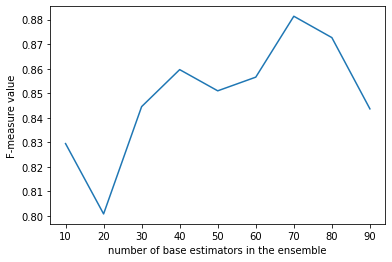

In [10]:
import matplotlib.pyplot as plt
plt.plot(f_list)
plt.xlabel("number of base estimators in the ensemble")
plt.ylabel("F-measure value")
plt.xticks(range(l_n_estimators.shape[0]),l_n_estimators)
plt.show()

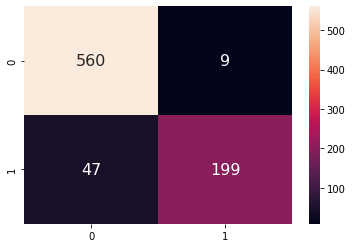

Isolation Forest metris: Precision: 0.96, Recall: 0.81,  F1: 0.88


In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

#prediction over the test set with the best model
t=tic()
predit_y=b_model.predict(data_test)
t=toc(t)
predit_ = [1 if l ==-1 else 0 for l in predit_y]

# metrics with isolation forest
R_test=recall_score(Y_test, predit_)
P_test=precision_score(Y_test, predit_)
F_test=f1_score(Y_test,predit_)

cf_matrix = confusion_matrix(Y_test, predit_)

sn.heatmap(cf_matrix, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

print('Isolation Forest metris: Precision: %.2f, Recall: %.2f,  F1: %.2f' %(P_test ,R_test ,F_test))

In [12]:
print('For this problem, 815 test items were predicted as normal or anomaly in a time of '+str(np.round(t,2))+' seconds\n')
print('* 569 normal \n')
print('* 246 anomalies \n')
print('Of the 569 normal items, '+str(cf_matrix[0][1])+' were mispredicted as anomalies. Besides, of the 246 anomalies, '+str(cf_matrix[1][0])+' were mispredicted as normal. Resulting in Precision: '+str(np.round(P_test,2))+', Recall: '+str(np.round(R_test,2))+',  F1: '+str(np.round(F_test,2)))

For this problem, 815 test items were predicted as normal or anomaly in a time of 0.06 seconds

* 569 normal 

* 246 anomalies 

Of the 569 normal items, 9 were mispredicted as anomalies. Besides, of the 246 anomalies, 47 were mispredicted as normal. Resulting in Precision: 0.96, Recall: 0.81,  F1: 0.88


**Gaussian Mixture Model**

In [13]:
from sklearn.mixture import GaussianMixture
# Training Gaussian Mixture Model with normal data
t=tic()
gausMix = GaussianMixture().fit(data_train)
t=toc(t)
print('The training of a data of '+str(data_train.shape[0])+' objects take '+str(np.round(t,2))+' seconds')

The training of a data of 283178 objects take 1.37 seconds


This anomaly detection approach models the features using a Gaussian distribution. First, the training set is used to fit the model. Then, with the validation set, the value for the hyper-parameter $\epsilon$ is set such that the algorithm will predict an anomaly or one if the  log-likelihood of the item is less than or equal to epsilon. However, if the  log-likelihood of the object is greater than epsilon, the prediction will be zero or normal.

In [14]:
from numpy import where,percentile
# compute the log-likelihood of each sample on the validation set.
scores = gausMix.score_samples(data_val)
r=np.arange(10,101,10)
f_likelihood=[0]*r.shape[0]
l_thresh=[0]*r.shape[0]
j=0
t=tic()
for i in r:
    thresh =np.percentile(scores, i)
    l_thresh[j]=thresh
    #prediction for each hyper-parameter
    predit_ = [1 if l <= thresh else 0 for l in scores]

    # metrics
    R=recall_score(Y_val, predit_)
    P=precision_score(Y_val, predit_)
    F=f1_score(Y_val,predit_)
    f_likelihood[j]=F
    j+=1  
t=toc(t)

# select the best threshold according to the validation set
best_n_estimators=np.argmax(f_likelihood)
b_thresh=l_thresh[best_n_estimators]
print('The process to obtain the best hyper-parameter according to the validation set take: '+str(np.round(t,2))+' seconds')

The process to obtain the best hyper-parameter according to the validation set take: 0.1 seconds


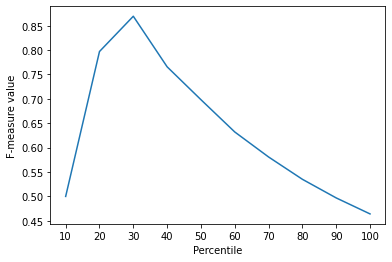

In [15]:
plt.plot(f_likelihood)
plt.xlabel("Percentile")
plt.ylabel("F-measure value")
plt.xticks(range(r.shape[0]),r)
plt.show()

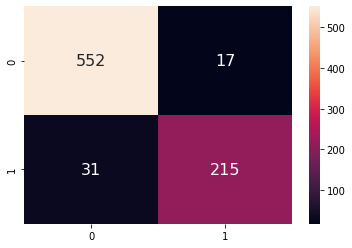

Gaussian Mixture Model metris: Precision: 0.93, Recall: 0.87,  F1: 0.90


In [16]:
# prediction over the test set with the best threshold 
t=tic()
scores = gausMix.score_samples(data_test)
t=toc(t)
predit_ = [1 if l <= b_thresh else 0 for l in scores]

# metrics
R_test=recall_score(Y_test, predit_)
P_test=precision_score(Y_test, predit_)
F_test=f1_score(Y_test,predit_)

cf_matrix = confusion_matrix(Y_test, predit_)

sn.heatmap(cf_matrix, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

print('Gaussian Mixture Model metris: Precision: %.2f, Recall: %.2f,  F1: %.2f' %(P_test ,R_test ,F_test))

In [17]:
print('For this problem, 815 test items were predicted as normal or anomaly in a time of '+str(np.round(t,2))+' seconds\n')
print('* 569 normal \n')
print('* 246 anomalies \n')
print('Of the 569 normal items, '+str(cf_matrix[0][1])+' were mispredicted as anomalies. Besides, of the 246 anomalies, '+str(cf_matrix[1][0])+' were mispredicted as normal. Resulting in Precision: '+str(np.round(P_test,2))+', Recall: '+str(np.round(R_test,2))+',  F1: '+str(np.round(F_test,2)))

For this problem, 815 test items were predicted as normal or anomaly in a time of 0.01 seconds

* 569 normal 

* 246 anomalies 

Of the 569 normal items, 17 were mispredicted as anomalies. Besides, of the 246 anomalies, 31 were mispredicted as normal. Resulting in Precision: 0.93, Recall: 0.87,  F1: 0.9


**One Class SVM**

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Fit the One Class SVM using the normal data in the training set
t=tic()
pipe = Pipeline([('scaler', StandardScaler()), ('ocsvm', OneClassSVM(gamma='auto'))])
pipe.fit(data_train)
t=toc(t)

print('The training of a data of '+str(data_train.shape[0])+' objects take '+str(np.round(t,2))+' seconds')

The training of a data of 283178 objects take 8056.68 seconds


In [19]:
from numpy import where,percentile
# compute the log-likelihood of each sample aver the validation set.
scores = pipe.score_samples(data_val)
r=np.arange(10,100,10)
f_likelihood=[0]*r.shape[0]
l_thresh=[0]*r.shape[0]
j=0
t=tic()
for i in r:
    thresh = np.percentile(scores, i)
    l_thresh[j]=thresh
    #prediction for each hyper-parameter
    predit_ = [1 if i <= thresh else 0 for i in scores]

    # metrics
    R=recall_score(Y_val, predit_)
    P=precision_score(Y_val, predit_)
    F=f1_score(Y_val,predit_)
    f_likelihood[j]=F
    j+=1  
t=toc(t)

# select the best threshold according to the validation set
best_n_estimators=np.argmax(f_likelihood)
b_thresh=l_thresh[best_n_estimators]
print('The process to obtain the best hyper-parameter according to the validation set take: '+str(np.round(t,2))+' seconds')

The process to obtain the best hyper-parameter according to the validation set take: 0.05 seconds


Text(0, 0.5, 'F-measure value')

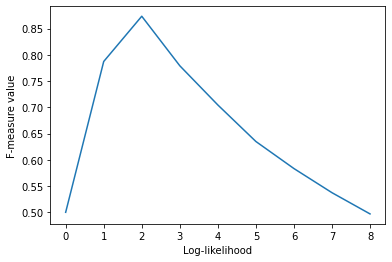

In [20]:
plt.plot(f_likelihood)
plt.xlabel("Log-likelihood")
plt.ylabel("F-measure value")

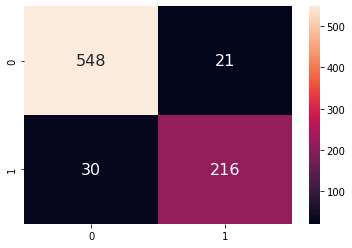

Gaussian Mixture Model metris: Precision: 0.91, Recall: 0.88,  F1: 0.89


In [21]:
#prediction over the test set

t=tic()
scores = pipe.score_samples(data_test)
t=toc(t)
predit_ = [1 if l <= b_thresh else 0 for l in scores]
# metrics
R_test=recall_score(Y_test, predit_)
P_test=precision_score(Y_test, predit_)
F_test=f1_score(Y_test,predit_)

cf_matrix = confusion_matrix(Y_test, predit_)

sn.heatmap(cf_matrix, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()

print('Gaussian Mixture Model metris: Precision: %.2f, Recall: %.2f,  F1: %.2f' %(P_test ,R_test ,F_test))

In [22]:
print('For this problem, 815 test items were predicted as normal or anomaly in a time of '+str(np.round(t,2))+' seconds\n')
print('* 569 normal \n')
print('* 246 anomalies \n')
print('Of the 569 normal items, '+str(cf_matrix[0][1])+' were mispredicted as anomalies. Besides, of the 246 anomalies, '+str(cf_matrix[1][0])+' were mispredicted as normal. Resulting in Precision: '+str(np.round(P_test,2))+', Recall: '+str(np.round(R_test,2))+',  F1: '+str(np.round(F_test,2)))

For this problem, 815 test items were predicted as normal or anomaly in a time of 10.28 seconds

* 569 normal 

* 246 anomalies 

Of the 569 normal items, 21 were mispredicted as anomalies. Besides, of the 246 anomalies, 30 were mispredicted as normal. Resulting in Precision: 0.91, Recall: 0.88,  F1: 0.89
